In [104]:
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import polars as pl
import matplotlib.pyplot as plt
import altair as alt

# Read in h5ad file for processed scRNA-seq data

In [70]:
adata = sc.read_h5ad("../data/scrna.h5ad")

## Sample metadata

In [71]:
obs_df = pl.from_pandas(adata.obs, include_index=True)
obs_df = obs_df.rename({"None": "cell_id"})

In [72]:
obs_df

cell_id,sample,n_counts,n_genes,percent_mito,doublet_score,dissociation_score,cell_type_original,patient_region_id,donor_id,patient_group,major_labl,final_cluster,assay_ontology_term_id,development_stage_ontology_term_id,disease_ontology_term_id,self_reported_ethnicity_ontology_term_id,is_primary_data,organism_ontology_term_id,sex_ontology_term_id,tissue_ontology_term_id,cell_type_ontology_term_id,suspension_type,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
str,cat,f64,i32,f64,f64,f64,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,bool,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,str
"""AAACCCACAAAGGAGA-1_1_1_1_1_1_1…","""CK158""",2598.0,1678,0.115473,0.000324,0.137064,"""Fibroblast""","""control_P1""","""P1""","""myogenic""","""CTRL""","""2""","""EFO:0009922""","""HsapDv:0000138""","""PATO:0000461""","""HANCESTRO:0005""",true,"""NCBITaxon:9606""","""PATO:0000384""","""UBERON:0002084""","""CL:0002548""","""nucleus""","""tissue""","""fibroblast of cardiac tissue""","""10x 3' v3""","""normal""","""Homo sapiens""","""male""","""heart left ventricle""","""European""","""44-year-old stage""","""ncLQ^>4V~0"""
"""AAACCCACAGAGATGC-1_1_1_1_1_1_1…","""CK158""",13003.0,4187,0.053834,0.003417,-0.006482,"""Cardiomyocyte""","""control_P1""","""P1""","""myogenic""","""CTRL""","""0""","""EFO:0009922""","""HsapDv:0000138""","""PATO:0000461""","""HANCESTRO:0005""",true,"""NCBITaxon:9606""","""PATO:0000384""","""UBERON:0002084""","""CL:0000513""","""nucleus""","""tissue""","""cardiac muscle myoblast""","""10x 3' v3""","""normal""","""Homo sapiens""","""male""","""heart left ventricle""","""European""","""44-year-old stage""","""OIH`^@&ZXS"""
"""AAACCCAGTAACGGTG-1_1_1_1_1_1_1…","""CK158""",6365.0,2700,0.047133,0.032239,0.00502,"""Cardiomyocyte""","""control_P1""","""P1""","""myogenic""","""CTRL""","""3""","""EFO:0009922""","""HsapDv:0000138""","""PATO:0000461""","""HANCESTRO:0005""",true,"""NCBITaxon:9606""","""PATO:0000384""","""UBERON:0002084""","""CL:0000513""","""nucleus""","""tissue""","""cardiac muscle myoblast""","""10x 3' v3""","""normal""","""Homo sapiens""","""male""","""heart left ventricle""","""European""","""44-year-old stage""","""e8Qt8qYxVF"""
"""AAACCCAGTCCAGAAG-1_1_1_1_1_1_1…","""CK158""",627.0,519,0.0,0.000365,0.087506,"""Fibroblast""","""control_P1""","""P1""","""myogenic""","""CTRL""","""2""","""EFO:0009922""","""HsapDv:0000138""","""PATO:0000461""","""HANCESTRO:0005""",true,"""NCBITaxon:9606""","""PATO:0000384""","""UBERON:0002084""","""CL:0002548""","""nucleus""","""tissue""","""fibroblast of cardiac tissue""","""10x 3' v3""","""normal""","""Homo sapiens""","""male""","""heart left ventricle""","""European""","""44-year-old stage""","""0SKw_<k7u@"""
"""AAACCCAGTCGTCGGT-1_1_1_1_1_1_1…","""CK158""",4488.0,1999,0.155971,0.004785,-0.001798,"""Cardiomyocyte""","""control_P1""","""P1""","""myogenic""","""CTRL""","""3""","""EFO:0009922""","""HsapDv:0000138""","""PATO:0000461""","""HANCESTRO:0005""",true,"""NCBITaxon:9606""","""PATO:0000384""","""UBERON:0002084""","""CL:0000513""","""nucleus""","""tissue""","""cardiac muscle myoblast""","""10x 3' v3""","""normal""","""Homo sapiens""","""male""","""heart left ventricle""","""European""","""44-year-old stage""","""B)sH)`nDwH"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TTTCATGGTCTTGCTC-1""","""CK376""",1153.0,940,0.0,0.521381,0.066911,"""Fibroblast""","""IZ_P16""","""P16""","""ischemic""","""IZ""","""19""","""EFO:0009922""","""HsapDv:0000160""","""MONDO:0005068""","""HANCESTRO:0005""",true,"""NCBITaxon:9606""","""PATO:0000384""","""UBERON:0002084""","""CL:0002548""","""nucleus""","""tissue""","""fibroblast of cardiac tissue""","""10x 3' v3""","""myocardial infarction""","""Homo sapiens""","""male""","""heart left ventricle""","""European""","""66-year-old stage""","""sQ@-q!5@uO"""
"""TTTCCTCAGGTTCATC-1""","""CK376""",657.0,570,0.456621,0.006264,0.019443,"""Lymphoid""","""IZ_P16""","

In [73]:
unique_values = {
    col: obs_df[col].unique().to_list()
    for col, dtype in zip(obs_df.columns, obs_df.dtypes)
    if dtype == pl.Categorical
}

In [74]:
unique_values['cell_type_original']

['Adipocyte',
 'Cardiomyocyte',
 'Cycling cells',
 'Endothelial',
 'Fibroblast',
 'Lymphoid',
 'Mast',
 'Myeloid',
 'Neuronal',
 'Pericyte',
 'vSMCs']

In [75]:
unique_values['patient_group']

['fibrotic', 'ischemic', 'myogenic']

In [76]:
unique_values['major_labl']

['BZ', 'CTRL', 'FZ', 'IZ', 'RZ']

### Keys for tissue classification

CTRL: Control  
IZ: Infarct Zone  
BZ: Border Zone  
RZ: Remote Zone  
FZ: Fibrotic Zone  

## Gene metadata

In [77]:
var_df = pl.from_pandas(adata.var, include_index=True)
var_df = var_df.rename({"None": "gene_id"})

In [78]:
var_df

gene_id,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
str,bool,cat,cat,cat,i64,cat
"""ENSG00000177613""",false,"""CSTF2T_ENSG00000177613""","""NCBITaxon:9606""","""gene""",4110,"""protein_coding"""
"""ENSG00000128918""",false,"""ALDH1A2_ENSG00000128918""","""NCBITaxon:9606""","""gene""",572,"""protein_coding"""
"""ENSG00000143977""",false,"""SNRPG_ENSG00000143977""","""NCBITaxon:9606""","""gene""",515,"""protein_coding"""
"""ENSG00000196177""",false,"""ACADSB_ENSG00000196177""","""NCBITaxon:9606""","""gene""",1091,"""protein_coding"""
"""ENSG00000244482""",false,"""LILRA6_ENSG00000244482""","""NCBITaxon:9606""","""gene""",1642,"""protein_coding"""
…,…,…,…,…,…,…
"""ENSG00000179152""",false,"""TCAIM_ENSG00000179152""","""NCBITaxon:9606""","""gene""",1817,"""protein_coding"""
"""ENSG00000248174""",false,"""LINC02268""","""NCBITaxon:9606""","""gene""",737,"""lncRNA"""
"""ENSG00000249875""",false,"""ENSG00000249875.1""","""NCBITaxon:9606""","""gene""",366,"""lncRNA"""


### Extract gene symbols from feature_name

In [79]:
adata.var['ensembl_id'] = adata.var.index
adata.var['gene_symbol'] = adata.var['feature_name'].str.split("_").str[0].astype(str)

In [80]:
adata.var.set_index("gene_symbol", inplace=True, drop=False)
adata.var_names_make_unique()

In [81]:
adata.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,ensembl_id,gene_symbol
gene_symbol,,,,,,,,
CSTF2T,False,CSTF2T_ENSG00000177613,NCBITaxon:9606,gene,4110,protein_coding,ENSG00000177613,CSTF2T
ALDH1A2,False,ALDH1A2_ENSG00000128918,NCBITaxon:9606,gene,572,protein_coding,ENSG00000128918,ALDH1A2
SNRPG,False,SNRPG_ENSG00000143977,NCBITaxon:9606,gene,515,protein_coding,ENSG00000143977,SNRPG
ACADSB,False,ACADSB_ENSG00000196177,NCBITaxon:9606,gene,1091,protein_coding,ENSG00000196177,ACADSB
LILRA6,False,LILRA6_ENSG00000244482,NCBITaxon:9606,gene,1642,protein_coding,ENSG00000244482,LILRA6
...,...,...,...,...,...,...,...,...
TCAIM,False,TCAIM_ENSG00000179152,NCBITaxon:9606,gene,1817,protein_coding,ENSG00000179152,TCAIM
LINC02268,False,LINC02268,NCBITaxon:9606,gene,737,lncRNA,ENSG00000248174,LINC02268
ENSG00000249875.1,False,ENSG00000249875.1,NCBITaxon:9606,gene,366,lncRNA,ENSG00000249875,ENSG00000249875.1


# UMAP visualizations in the original publication

## Cell type

In [45]:
new_order = ["Adipocyte", "Cardiomyocyte", "Endothelial", "Fibroblast", "Lymphoid", "Mast", "Myeloid", "Neuronal", "Pericyte", "Cycling cells", "vSMCs"]
adata.obs['cell_type_original'] = adata.obs['cell_type_original'].cat.reorder_categories(new_order, ordered=True)

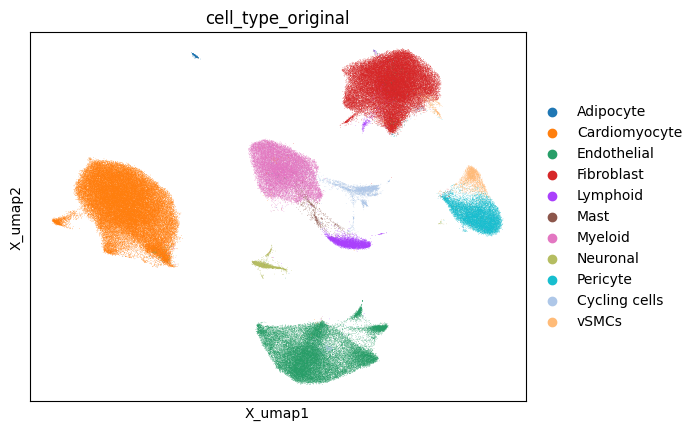

In [46]:
sc.pl.embedding(adata, color="cell_type_original", basis="X_umap")

## Patient

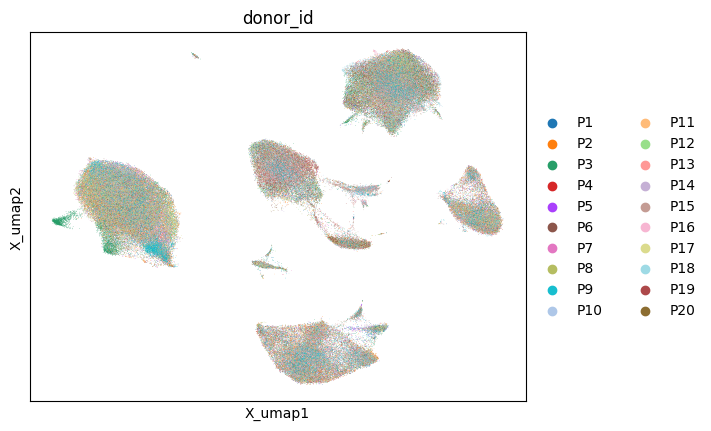

In [41]:
sc.pl.embedding(adata, color="donor_id", basis="X_umap")

## Infarct zones

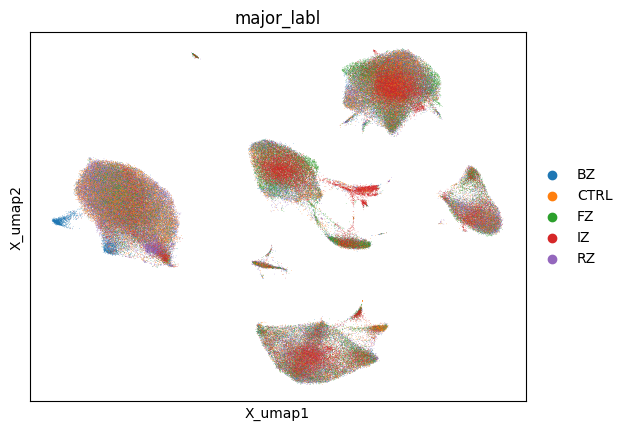

In [42]:
sc.pl.embedding(adata, color="major_labl", basis="X_umap")

## Leiden clustering

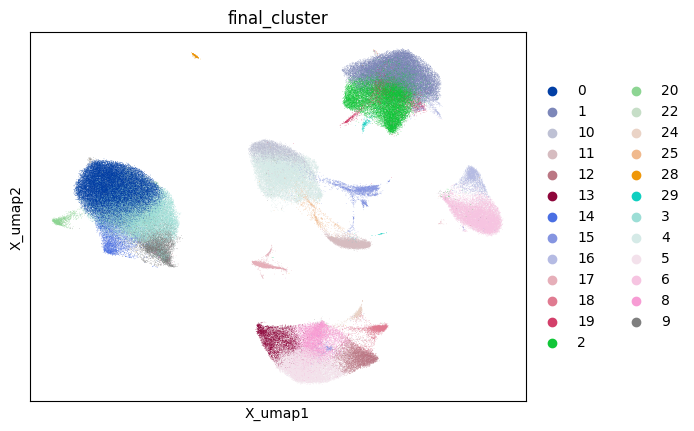

In [49]:
sc.pl.embedding(adata, color="final_cluster", basis="X_umap")

In [50]:
adata

AnnData object with n_obs × n_vars = 191795 × 28975
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'donor_id', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'X_approximate_distribution', 'batch_condition', 'cell_type_original_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title', 'donor_id_colors', 'major_labl

## Cell cycle scores

In [91]:
cell_cycle_genes = [x.strip() for x in open('../data/regev_lab_cell_cycle_genes.txt')]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

In [92]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

In [100]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes, use_raw=False)

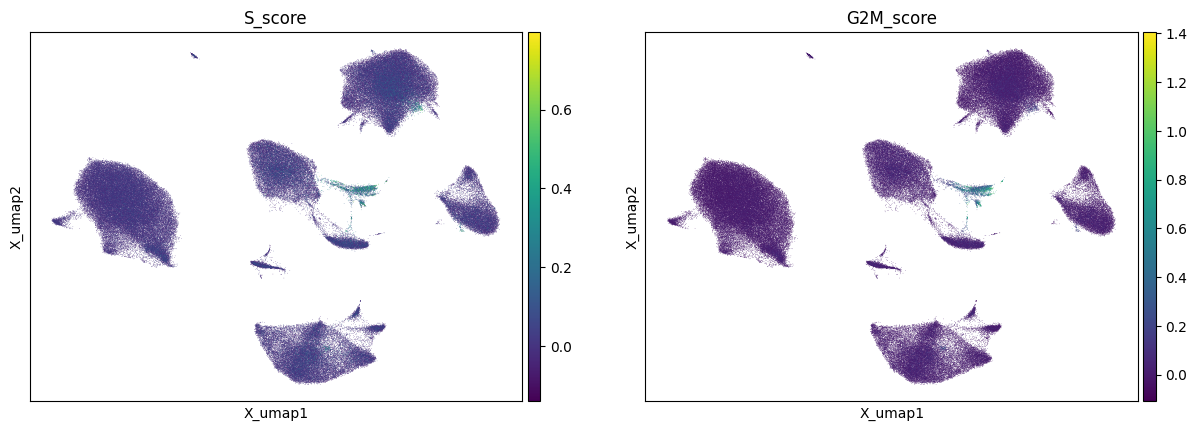

In [102]:
sc.pl.embedding(adata, color=["S_score", "G2M_score"], basis="X_umap")

In [105]:
## Cell type proportions across samples

In [126]:
celltype_props = (
    obs_df
    .group_by(['cell_type_original', 'patient_region_id'])
    .agg(pl.len().alias('count'))
    .with_columns([
        pl.col('cell_type_original').cast(pl.Enum(new_order)).alias('cell_type_original'),
        (pl.col("count")/pl.col("count").sum().over("patient_region_id")).alias('proportion')
    ])
)

In [128]:
color_dict = dict(zip(
    adata.obs["cell_type_original"].cat.categories,
    adata.uns["cell_type_original_colors"]
))

In [136]:
alt.renderers.enable("mimetype")

RendererRegistry.enable('mimetype')

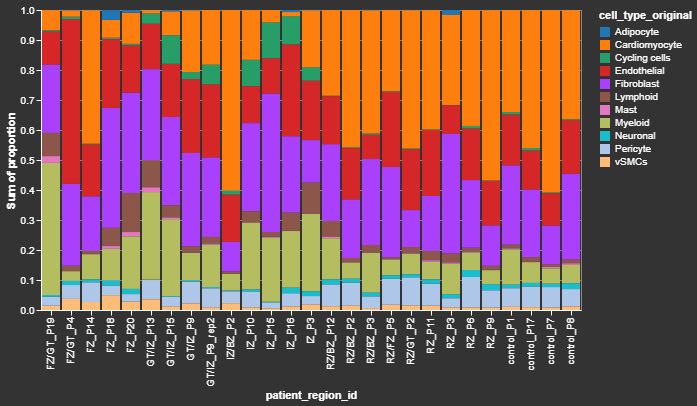

In [137]:
alt.Chart(celltype_props).mark_bar().encode(
    x="patient_region_id:N",
    y=alt.Y("sum(proportion):Q", scale=alt.Scale(domain=[0, 1])),
    color=alt.Color("cell_type_original:N", scale=alt.Scale(domain=list(color_dict.keys()),
                                                            range=list(color_dict.values())))
)